In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import numpy as np # linear algebra
import pandas as pd # data processing 
import random


# for graphing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

# machine learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay

# neural networks
import keras
import tensorflow as tf
from tensorflow.keras import models, backend, losses, optimizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam



import warnings
warnings.filterwarnings("ignore")

2025-08-21 00:10:54.461618: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755735054.864617      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755735054.974135      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# get the package versions
print('version of numpy is:{}'.format(np.__version__))
print('version of pandas is:{}'.format(pd.__version__))
print('version of matplotlib is:{}'.format(matplotlib.__version__))
print('version of seaborn is:{}'.format(sns.__version__))
print('version of opencv is:{}'.format(cv2.__version__))
print('version of scikit-learn is:{}'.format(sklearn.__version__))
print('version of keras is:{}'.format(keras.__version__))
print('version of tensorflow is:{}'.format(tf.__version__))


version of numpy is:1.26.4
version of pandas is:2.2.3
version of matplotlib is:3.7.2
version of seaborn is:0.12.2
version of opencv is:4.11.0
version of scikit-learn is:1.2.2
version of keras is:3.8.0
version of tensorflow is:2.18.0


In [3]:
# read in the training data
train_df= pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print(train_df.head())
print("shape of training data is: ", train_df.shape)

# read in the test data
test_df= pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print('-'*80)
print('test dataframe')
print(test_df.head())
print("shape of test data is: ", test_df.shape)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
# split training into training and validation
pre_y_train= train_df['label']
pre_x_train= train_df.drop(['label'], axis= 1)


x_train, x_val, y_train, y_val= train_test_split(pre_x_train, pre_y_train, test_size= 0.2, stratify= pre_y_train)


print('shape of x_train is :{}'.format(x_train.shape))
print('shape of y_train is :{}'.format(y_train.shape))
print('shape of x_val is :{}'.format(x_val.shape))
print('shape of y_val is :{}'.format(y_val.shape))


shape of x_train is :(33600, 784)
shape of y_train is :(33600,)
shape of x_val is :(8400, 784)
shape of y_val is :(8400,)


In [5]:
x_train= x_train.reset_index(drop= True)
y_train= y_train.reset_index(drop= True)
x_val= x_val.reset_index(drop= True)
y_val= y_val.reset_index(drop= True)

just finished array: 0
just finished array: 1000
just finished array: 2000
just finished array: 3000
just finished array: 4000
just finished array: 5000
just finished array: 6000
just finished array: 7000
just finished array: 8000
just finished array: 9000
just finished array: 10000
just finished array: 11000
just finished array: 12000
just finished array: 13000
just finished array: 14000
just finished array: 15000
just finished array: 16000
just finished array: 17000
just finished array: 18000
just finished array: 19000
just finished array: 20000
just finished array: 21000
just finished array: 22000
just finished array: 23000
just finished array: 24000
just finished array: 25000
just finished array: 26000
just finished array: 27000
just finished array: 28000
just finished array: 29000
just finished array: 30000
just finished array: 31000
just finished array: 32000
just finished array: 33000
--------------------------------------------------------------------------------
2
shape of x_t

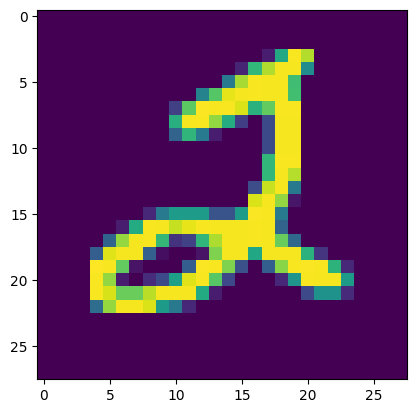

In [6]:
# convert training data to array
array1= x_train.to_numpy()
# empty list to store arrays
train_list= []

# loop to reshape each row into 3D array and store in list
for i in range(x_train.shape[0]):
    array2= array1[i, :].reshape(28, 28, 1)
    train_list.append(array2)
    # print progress every 1000 arrays
    if (i % 1000) == 0:
        print('just finished array: {}'.format(i))

# convert list to array
x_train= np.array(train_list)

# check array shape and array elements
print('-'*80)
plt.imshow(x_train[51])
print(y_train[51])
print('shape of x_train is: ', x_train.shape)

just finished array: 0
just finished array: 500
just finished array: 1000
just finished array: 1500
just finished array: 2000
just finished array: 2500
just finished array: 3000
just finished array: 3500
just finished array: 4000
just finished array: 4500
just finished array: 5000
just finished array: 5500
just finished array: 6000
just finished array: 6500
just finished array: 7000
just finished array: 7500
just finished array: 8000
--------------------------------------------------------------------------------
6
shape of x_val is:  (8400, 28, 28, 1)


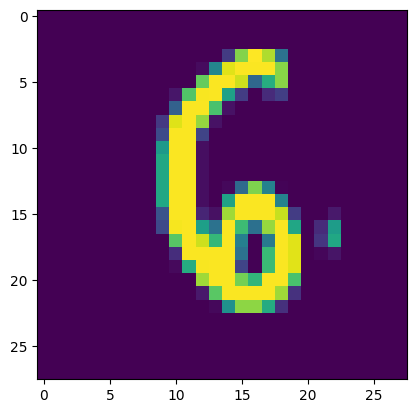

In [7]:
# convert validation data to array
array10= x_val.to_numpy()
# empty list to store arrays
val_list= []

# loop to reshape each row into 3D array and store in list
i= 0
for i in range(x_val.shape[0]):
    array20= array10[i, :].reshape(28, 28, 1)
    val_list.append(array20)
    # print progress every 1000 arrays
    if (i % 500) == 0:
        print('just finished array: {}'.format(i))

# convert list to array
x_val= np.array(val_list)

# check array shape and array elements
print('-'*80)
plt.imshow(x_val[51])
print(y_val[51])
print('shape of x_val is: ', x_val.shape)

just finished array: 0
just finished array: 1000
just finished array: 2000
just finished array: 3000
just finished array: 4000
just finished array: 5000
just finished array: 6000
just finished array: 7000
just finished array: 8000
just finished array: 9000
just finished array: 10000
just finished array: 11000
just finished array: 12000
just finished array: 13000
just finished array: 14000
just finished array: 15000
just finished array: 16000
just finished array: 17000
just finished array: 18000
just finished array: 19000
just finished array: 20000
just finished array: 21000
just finished array: 22000
just finished array: 23000
just finished array: 24000
just finished array: 25000
just finished array: 26000
just finished array: 27000
--------------------------------------------------------------------------------
shape of x_test is:  (28000, 28, 28, 1)


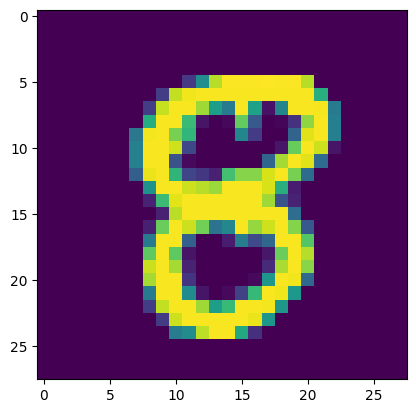

In [8]:
# convert test data to array
array100= test_df.to_numpy()
# empty list to store arrays
test_list= []

# loop to reshape each row into 3D array and store in list
i= 0
for i in range(test_df.shape[0]):
    array200= array100[i, :].reshape(28, 28, 1)
    test_list.append(array200)
    # print progress every 1000 arrays
    if (i % 1000) == 0:
        print('just finished array: {}'.format(i))

# convert list to array
x_test= np.array(test_list)

# check array shape and array elements
print('-'*80)
plt.imshow(x_test[51])
print('shape of x_test is: ', x_test.shape)

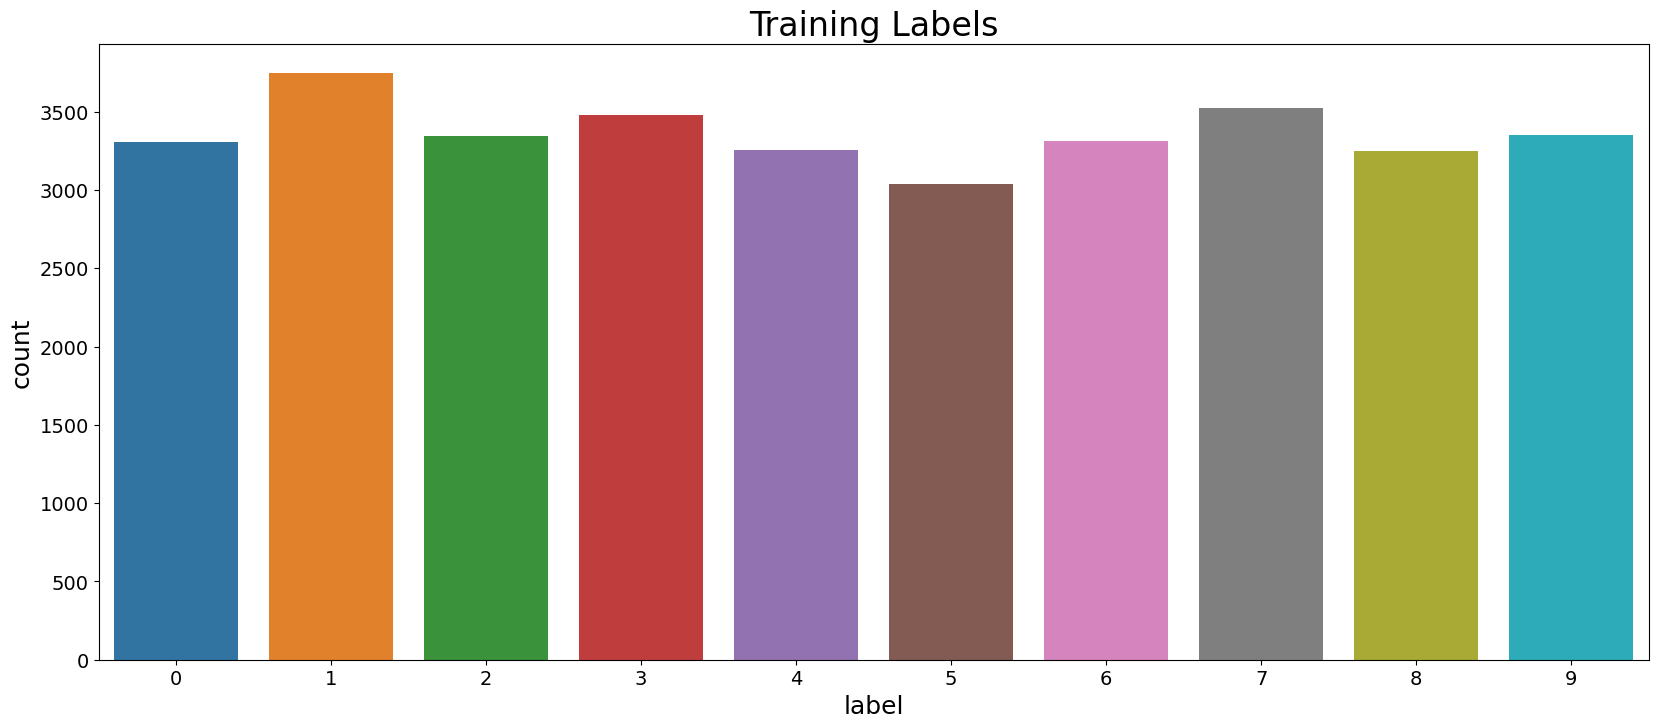

In [9]:
# look at training labels

fig1= plt.figure(figsize= (20, 8))
ax1= plt.gca()
ax1.set_title('Training Labels', fontsize= 24)
ax1.set_ylabel('Counts', fontsize= 18)
ax1.set_xlabel('Label', fontsize= 18)
ax1.tick_params(axis='y', which='major', labelsize=14)
ax1.tick_params(axis='x', which='major', labelsize=14)
ax1= sns.countplot(x= y_train)



training data is relatively balanced.

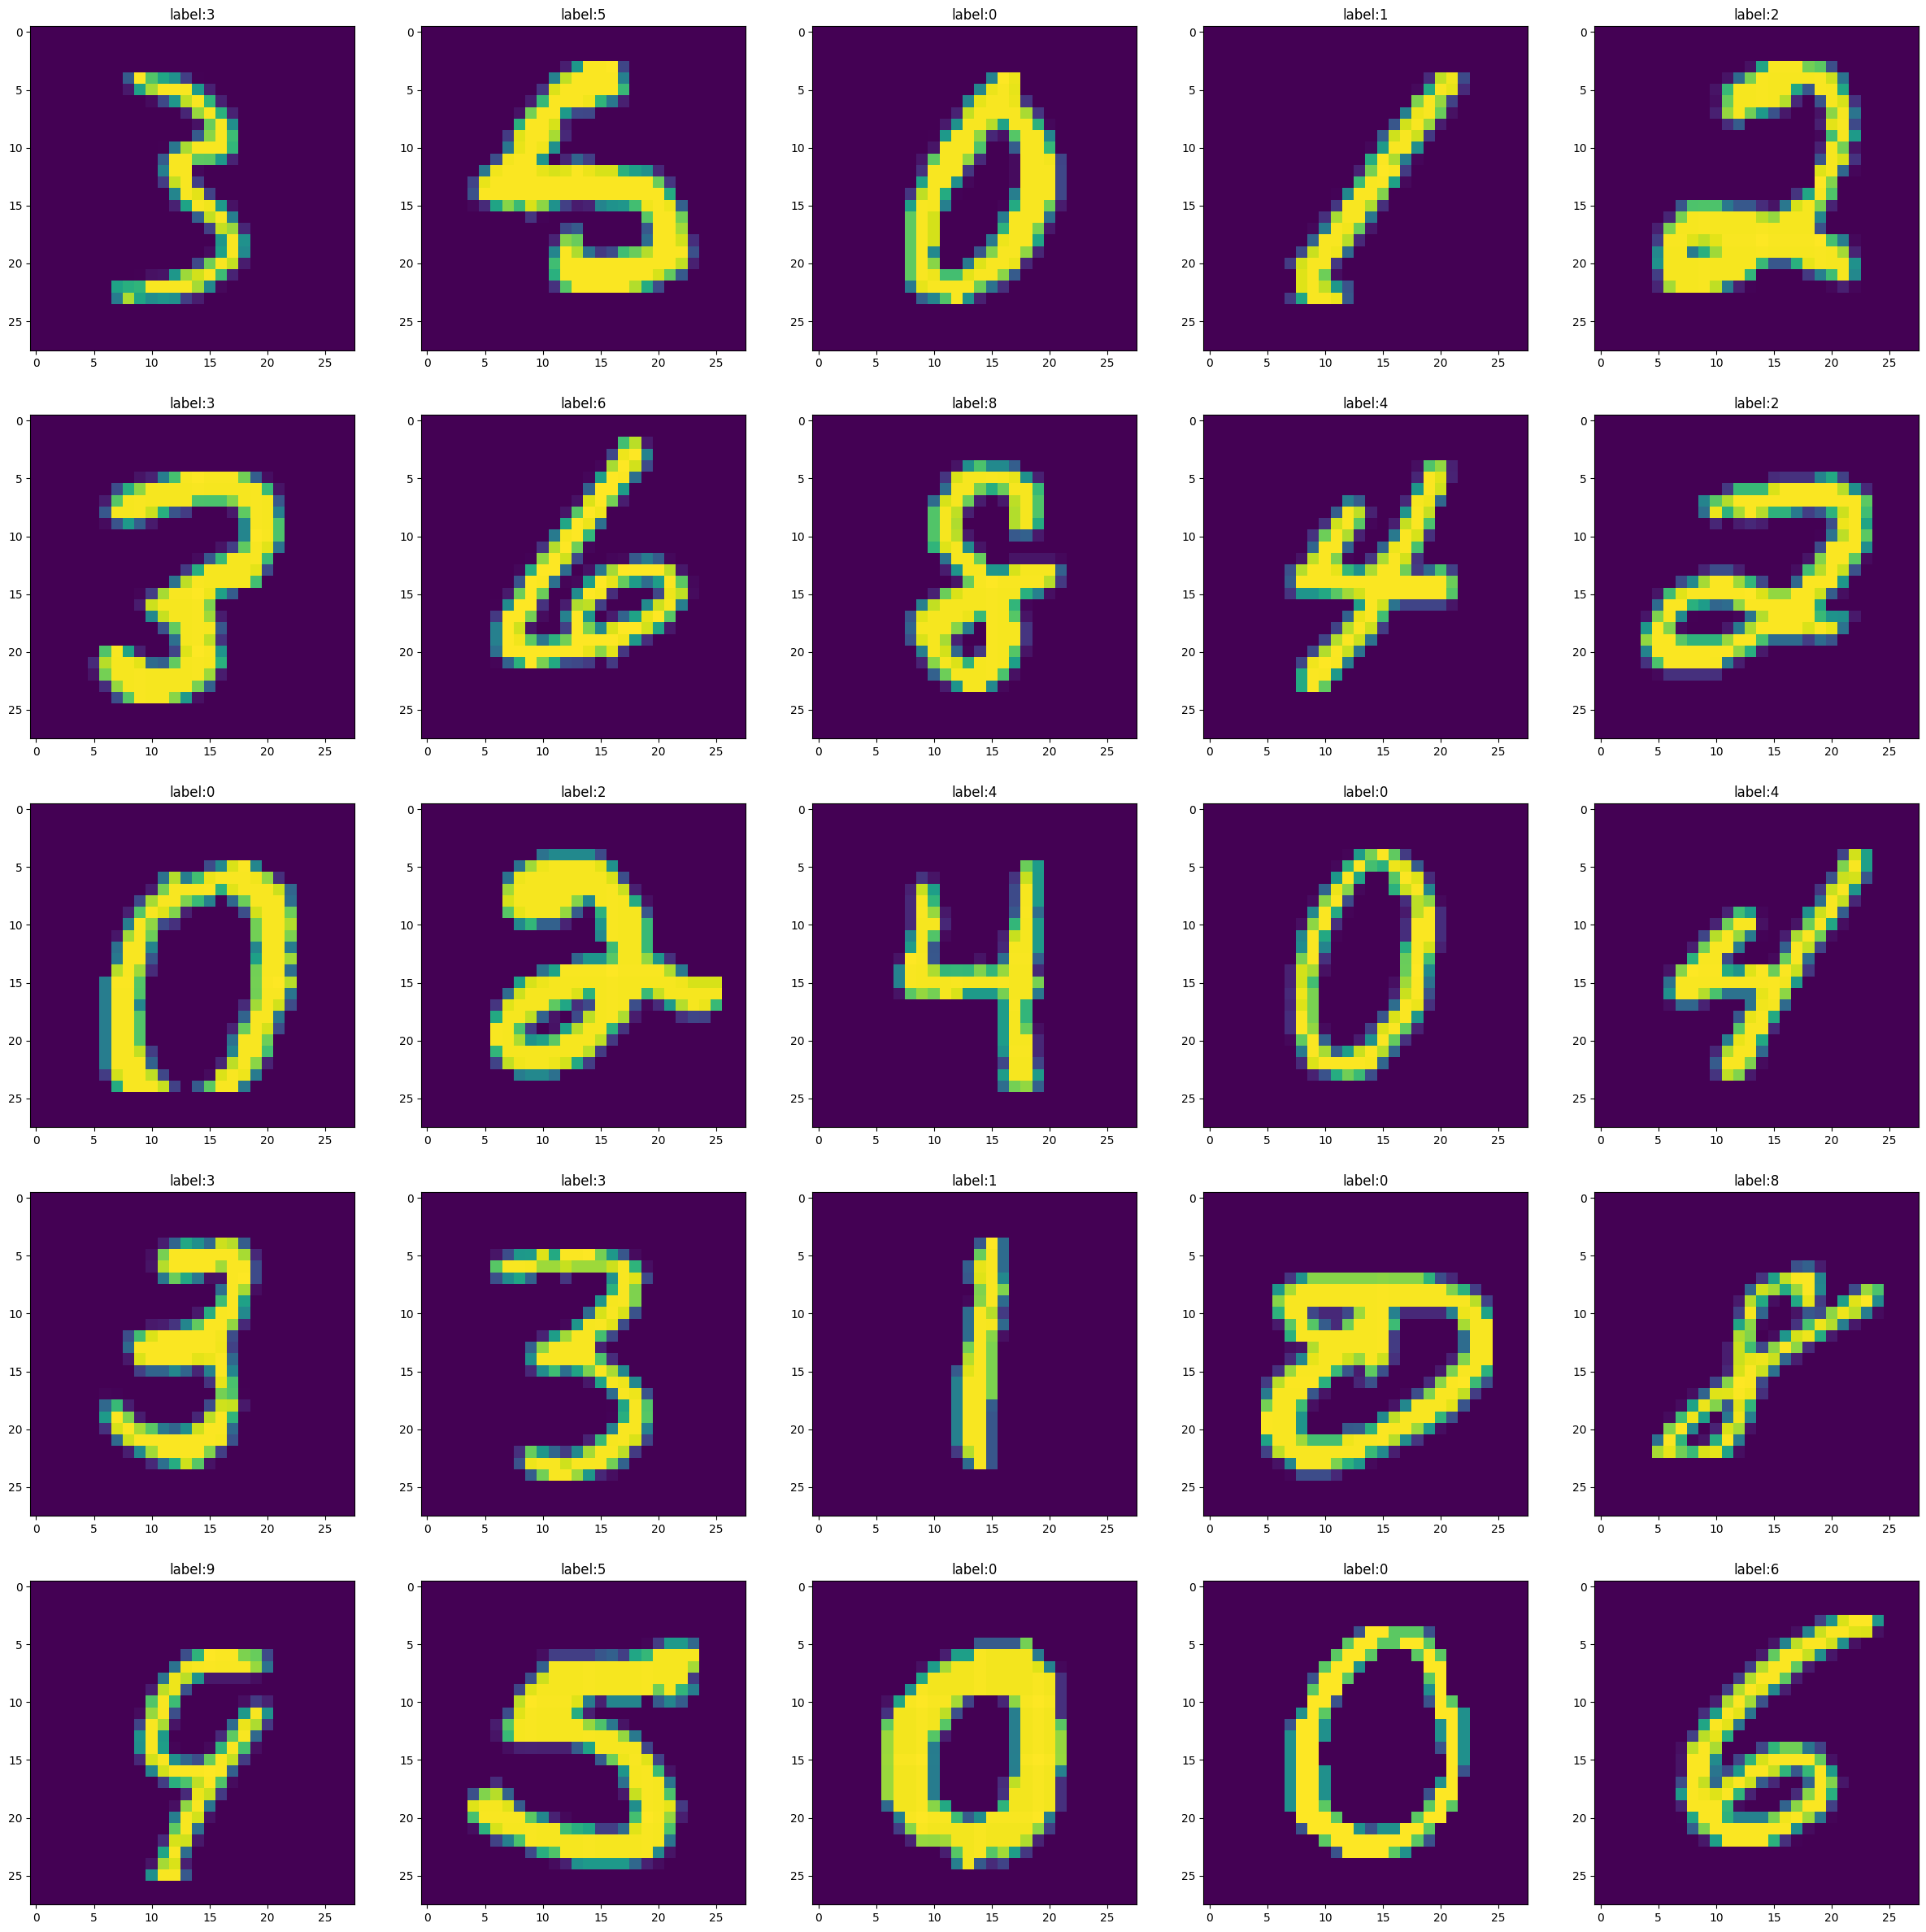

In [10]:
# look at the training images

# make random list of integers
rand_list= random.sample(range(0, 33000), 25)

# initialize i, j and counter
count1= 0
i= 0
j= 0
# loop to make subplots showing 25 random x_train images
fig2, ax2= plt.subplots(5, 5, figsize= (30, 30))
for i in range(5):
    for j in range(5):
        a= "label:" + str(y_train[rand_list[count1]])
        ax2[i, j].imshow(x_train[rand_list[count1]])
        ax2[i, j].set_title(a)
        count1= count1 + 1


In [11]:
# find min and max values for: the training, validation and test

x_train_min= np.min(x_train)
x_train_max= np.max(x_train)
print('x_train min is:{} and x_train max is:{}'.format(x_train_min, x_train_max))

x_val_min= np.min(x_val)
x_val_max= np.max(x_val)
print('-'*80)
print('x_val min is:{} and x_val max is:{}'.format(x_val_min, x_val_max))

x_test_min= np.min(x_test)
x_test_max= np.max(x_test)
print('-'*80)
print('x_test min is:{} and x_test max is:{}'.format(x_test_min, x_test_max))

x_train min is:0 and x_train max is:255
--------------------------------------------------------------------------------
x_val min is:0 and x_val max is:255
--------------------------------------------------------------------------------
x_test min is:0 and x_test max is:255


In [12]:
# normalize training, validation and testing

x_train_norm= x_train/255
x_val_norm= x_val/255
x_test_norm= x_test/255

print('x_train_norm max is:{}'.format(np.max(x_train_norm)))
print('-'*80)
print('x_val_norm max is:{}'.format(np.max(x_val_norm)))
print('-'*80)
print('x_test_norm max is:{}'.format(np.max(x_test_norm)))

x_train_norm max is:1.0
--------------------------------------------------------------------------------
x_val_norm max is:1.0
--------------------------------------------------------------------------------
x_test_norm max is:1.0


In [13]:
# need to one hot encode y_train and y_val

y_train_encode= to_categorical(y_train)
y_val_encode= to_categorical(y_val)

print('y_train shape is:{} and y_train_encode shape is:{}'.format(y_train.shape, y_train_encode.shape))
print('y_val shape is:{} and y_val_encode shape is:{}'.format(y_val.shape, y_val_encode.shape))

y_train shape is:(33600,) and y_train_encode shape is:(33600, 10)
y_val shape is:(8400,) and y_val_encode shape is:(8400, 10)


In [14]:
# to get label use np.argmax(axis= 1)
print(y_train.head(10))
test1= np.argmax(y_train_encode, axis= 1)
print(test1[0:10])

0    9
1    4
2    0
3    4
4    5
5    4
6    6
7    8
8    5
9    8
Name: label, dtype: int64
[9 4 0 4 5 4 6 8 5 8]


In [15]:
# clear backend
backend.clear_session()

In [16]:
# use seed for reproducibility
seed= 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [17]:
# make CNN model 1- basic
model_1= models.Sequential()

model_1.add(Conv2D(28, kernel_size= (3, 3), padding= 'same', input_shape= (28, 28, 1)))
model_1.add(LeakyReLU(negative_slope= 0.3))

model_1.add(Conv2D(28, kernel_size= (3, 3), padding= 'same'))
model_1.add(LeakyReLU(negative_slope= 0.3))
model_1.add(Dropout(0.25))

model_1.add(Conv2D(28, kernel_size= (3, 3), padding= 'same'))
model_1.add(LeakyReLU(negative_slope= 0.3))
model_1.add(MaxPooling2D(pool_size= (2, 2)))

model_1.add(Conv2D(14, kernel_size= (3, 3), padding= 'same'))
model_1.add(LeakyReLU(negative_slope= 0.3))

model_1.add(Conv2D(14, kernel_size= (3, 3), padding= 'same'))
model_1.add(LeakyReLU(negative_slope= 0.3))


model_1.add(Flatten())
model_1.add(Dense(14))
model_1.add(LeakyReLU(negative_slope= 0.3))
model_1.add(Dropout(0.25))
model_1.add(Dense(10, activation= 'softmax'))


2025-08-21 00:11:27.721871: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [18]:
# model summary
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 28)     │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 28)     │         7,084 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 28, 28, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 28)     │         7,084 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 28, 28, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 28)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 14)     │         3,542 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 14, 14, 14)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 14)     │         1,778 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 14, 14, 14)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 14)             │        38,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,348 (227.92 KB)

 Trainable params: 58,348 (227.92 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# model compile
adam1= Adam(learning_rate= 0.001)
model_1.compile(optimizer= adam1, loss= 'categorical_crossentropy', metrics= ['accuracy'])
model_1.compile(optimizer= adam1)

In [20]:
# use checkpoints
es= EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience= 5)                                      # define early stopping
mc= ModelCheckpoint('/kaggle/working/model_1.h5', monitor= 'val_loss', mode= 'min', verbose= 1, save_best_only= True)    # save only best model

In [21]:
#fit the model
history1= model_1.fit(x_train_norm, y_train_encode, batch_size= 50, validation_split= 0.2, callbacks= [es, mc], verbose= 1, epochs= 30)

Epoch 1/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.7443 - loss: 0.7745
Epoch 1: val_loss improved from inf to 0.14777, saving model to /kaggle/working/model_1.h5
538/538 ━━━━━━━━━━━━━━━━━━━━ 71s 124ms/step - accuracy: 0.7445 - loss: 0.7739 - val_accuracy: 0.9583 - val_loss: 0.1478
Epoch 2/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9379 - loss: 0.1997
Epoch 2: val_loss improved from 0.14777 to 0.10321, saving model to /kaggle/working/model_1.h5
538/538 ━━━━━━━━━━━━━━━━━━━━ 65s 120ms/step - accuracy: 0.9379 - loss: 0.1996 - val_accuracy: 0.9705 - val_loss: 0.1032
Epoch 3/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.9587 - loss: 0.1390
Epoch 3: val_loss improved from 0.10321 to 0.07351, saving model to /kaggle/working/model_1.h5
538/538 ━━━━━━━━━━━━━━━━━━━━ 65s 121ms/step - accuracy: 0.9587 - loss: 0.1390 - val_accuracy: 0.9768 - val_loss: 0.0735
Epoch 4/30
538/538 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.9657 - loss: 0.1125
Epoch 4

In [22]:
# convert history to dataframe
hist1_dict= history1.history
hist1_df= pd.DataFrame(data= hist1_dict, columns= ['accuracy', 'loss', 'val_accuracy', 'val_loss'])

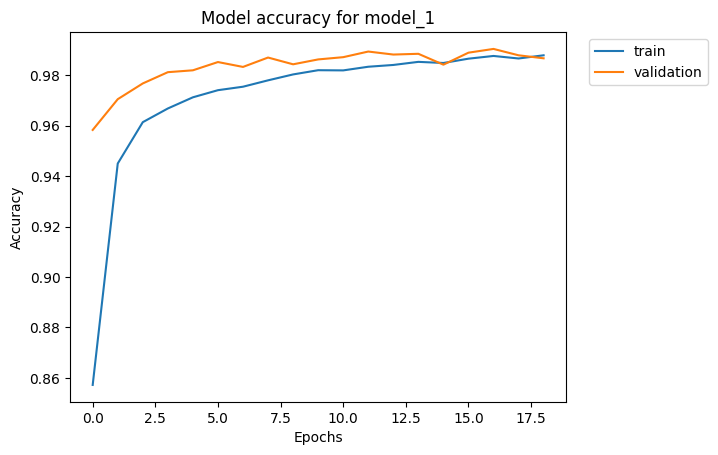

In [23]:
#figure to compare training and validation accuracy for base_model
plt.plot(hist1_df['accuracy'], label= 'train')                                 # plot training accuracy
plt.plot(hist1_df['val_accuracy'], label= 'validation')                        # plot validation accuracy
plt.title('Model accuracy for model_1')                                     # set plot title
plt.ylabel('Accuracy')                                                         # set y axis label
plt.xlabel('Epochs')                                                           # set x axis label
plt.legend(loc= 'upper right', bbox_to_anchor= (1.3, 1));                       # define and place legend

Training and validation have high accuracy.  Training and validation are close to each other so no overfitting.

In [24]:
# load weights from best model
model_1.load_weights('/kaggle/working/model_1.h5')

In [25]:
# make predictions with base model_1 on validation
pred_1= model_1.predict(x_val_norm)

# convert prediction from one hot encode to single value
pred_1= np.argmax(pred_1, axis= 1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step


In [26]:
# classification report
print(classification_report(y_val, pred_1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       827
           1       0.99      1.00      0.99       937
           2       0.99      1.00      0.99       835
           3       1.00      0.98      0.99       870
           4       0.99      0.99      0.99       814
           5       0.98      0.99      0.99       759
           6       0.99      0.99      0.99       827
           7       0.99      0.98      0.98       880
           8       0.99      0.98      0.99       813
           9       0.99      0.97      0.98       838

    accuracy                           0.99      8400
   macro avg       0.99      0.99      0.99      8400
weighted avg       0.99      0.99      0.99      8400



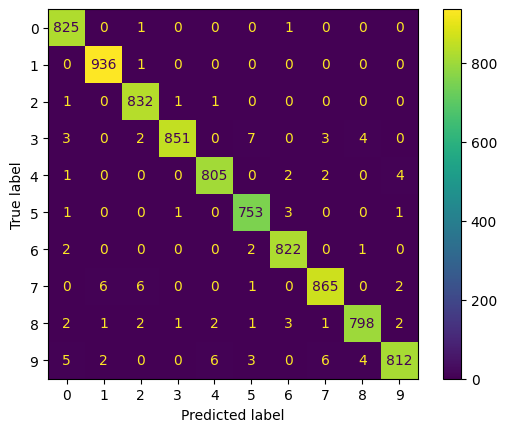

In [27]:
# make the confusion matrix
ConfusionMatrixDisplay.from_predictions(y_val, pred_1)

Model has high accuracy, precision, f1 score and recall.  Few misclassifications on validation data.

In [28]:
# use CNN model to predict x_test
y_pred_test= model_1.predict(x_test_norm)

y_pred_test= np.argmax(y_pred_test, axis= 1)

y_test1= list(enumerate(y_pred_test, start= 1))

sub_df= pd.DataFrame(y_test1, columns= ['ImageId', 'Label'])
sub_df.head()

# submit file
sub_df.to_csv('/kaggle/working/submission.csv', index= False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step
